In [1]:

######## snakemake preamble start (automatically inserted, do not edit) ########
library(methods)
Snakemake <- setClass(
    "Snakemake",
    slots = c(
        input = "list",
        output = "list",
        params = "list",
        wildcards = "list",
        threads = "numeric",
        log = "list",
        resources = "list",
        config = "list",
        rule = "character",
        bench_iteration = "numeric",
        scriptdir = "character",
        source = "function"
    )
)
snakemake <- Snakemake(
    input = list('/home/brandon/data/pingyin/snmultiome/input/1633LM/outs'),
    output = list('results/0_initialization/1633LM/SoupX'),
    params = list(),
    wildcards = list('1633LM', "sample" = '1633LM'),
    threads = 1,
    log = list('logs/notebooks/0_initialization/1633LM/1-run_soupX.ipynb', "notebook" = 'logs/notebooks/0_initialization/1633LM/1-run_soupX.ipynb'),
    resources = list('tmpdir', "tmpdir" = '/tmp'),
    config = list("data_dir" = '/home/brandon/data/pingyin/snmultiome/input/', "results_dir" = 'results/', "samples" = c('1619LM', '1619MM', '1633LM', '1633MM-repeat'), "RNA" = list("celltypist_model" = 'Human_Endometrium_Atlas.pkl', "qc" = list("min_genes" = 200L, "min_counts" = 500L, "pct_counts_mt" = 5L, "pct_counts_ribo" = 5L, "doublet_score" = 0.3, "min_cells" = 3L)), "ATAC" = list("blacklist" = 'resources/hg38-blacklist.v2.bed', "qc" = list("min_tsse" = 7L, "min_counts" = 1000L, "min_cells" = 3L))),
    rule = 'run_soupX',
    bench_iteration = as.numeric(NA),
    scriptdir = '/home/brandon/code/pingyin/snmultiome/workflow/rules/../notebooks/0_initialization',
    source = function(...){
        old_wd <- getwd()
        on.exit(setwd(old_wd), add = TRUE)

        is_url <- grepl("^https?://", snakemake@scriptdir)
        file <- ifelse(is_url, file.path(snakemake@scriptdir, ...), ...)
        if (!is_url) setwd(snakemake@scriptdir)
        source(file)
    }
)
setwd('/home/brandon/code/pingyin/snmultiome');

######## snakemake preamble end #########


# Ambient RNA removal with SoupX

In [2]:
## Load libraries
library(SoupX)
library(DropletUtils)

Loading required package: SingleCellExperiment



Loading required package: SummarizedExperiment



Loading required package: MatrixGenerics



Loading required package: matrixStats




Attaching package: ‘MatrixGenerics’




The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, rowTabulates, rowVarDiffs, rowVars,
    rowWeightedMads, rowWeightedMeans, rowWeightedMedians,
    rowWeightedSds, rowWeig

Loading required package: GenomicRanges



Loading required package: stats4



Loading required package: BiocGenerics




Attaching package: ‘BiocGenerics’




The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs




The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min




Loading required package: S4Vectors




Attaching package: ‘S4Vectors’




The following object is masked from ‘package:utils’:

    findMatches




The following objects are masked from ‘package:base’:

    expand.grid, I, unname




Loading required package: IRanges



Loading required package: GenomeInfoDb



Loading required package: Biobase



Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.





Attaching package: ‘Biobase’




The following object is masked from ‘package:MatrixGenerics’:

    rowMedians




The following objects are masked from ‘package:matrixStats’:

    anyMissing, rowMedians




In [3]:
## Read input and output paths from Snakemake
data_dir <- snakemake@input[[1]]
out_dir <- snakemake@output[[1]]

Loading raw count data



10X data contains more than one type and is being returned as a list containing matrices of each type.



Loading cell-only count data



10X data contains more than one type and is being returned as a list containing matrices of each type.



Loading extra analysis data where available



571 genes passed tf-idf cut-off and 323 soup quantile filter.  Taking the top 100.



Using 331 independent estimates of rho.



Estimated global rho of 0.07



Warning message in sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w], :
“'giveCsparse' is deprecated; setting repr="T" for you”


Expanding counts from 15 clusters to 9460 cells.



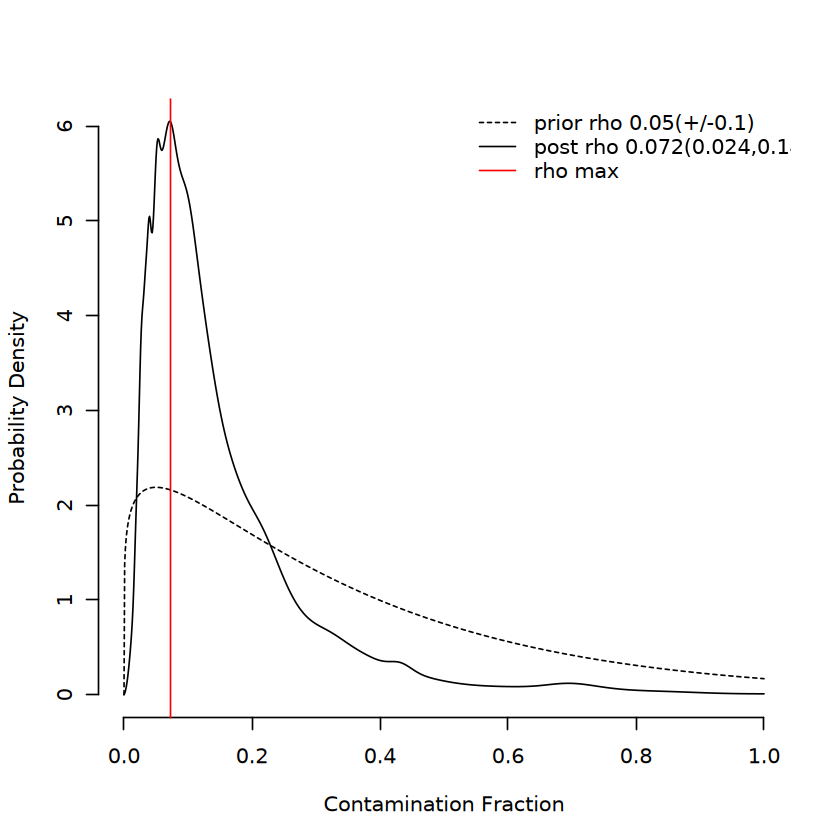

In [4]:
## Load raw 10X data
sc <- load10X(data_dir)

## Estimate ambient RNA contamination
sc <- autoEstCont(sc)

## Adjust counts
out <- adjustCounts(sc, roundToInt = TRUE)

In [5]:
## Write cleaned count matrix
DropletUtils::write10xCounts(out_dir, out)